In [1]:
# import os
# import io
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

import scipy.stats as stats

In [2]:
dist = stats.beta

n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

data =  stats.bernoulli.rvs(0.5, size=n_trials[-1])

x = np.linspace(0, 1, 100)

In [9]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [7]:
data[0]

np.int64(1)

In [11]:
dist.pdf


<bound method rv_continuous.pdf of <scipy.stats._continuous_distns.beta_gen object at 0x7fc158295190>>

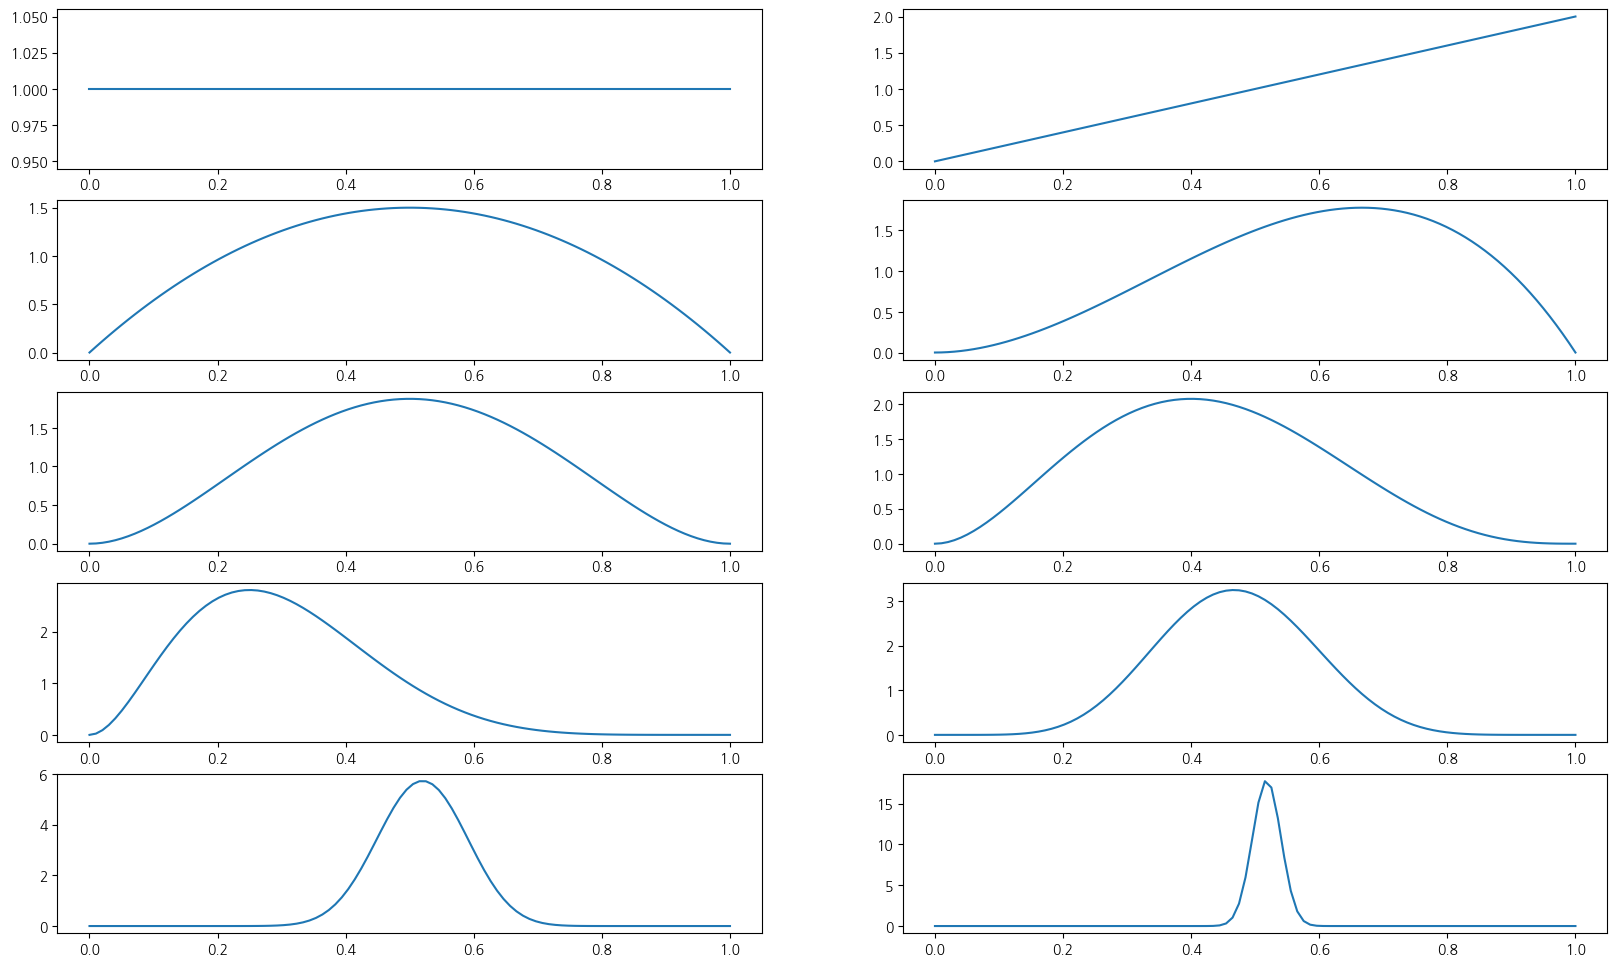

In [5]:
plt.figure(figsize=(20, 12))

for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials) / 2), 2, k + 1)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기,\n앞면 %d 번 관측" % (N, heads))



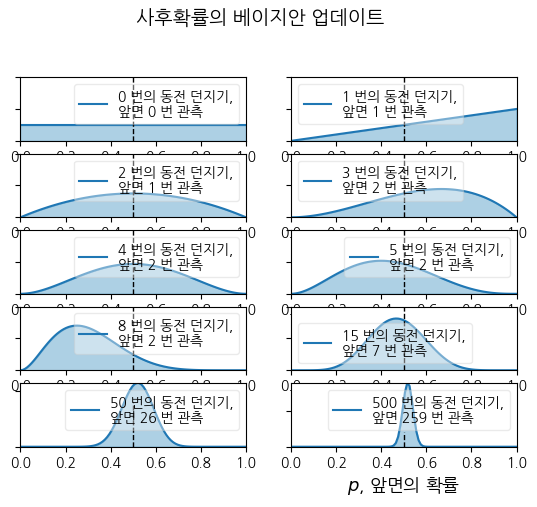

<Figure size 4000x2000 with 0 Axes>

In [8]:
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials) / 2), 2, k + 1)
    plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기,\n앞면 %d 번 관측" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)
plt.figure(figsize=(40, 20))
plt.tight_layout()